## Importing Libraries

In [ ]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import  datasets, tree 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading dataset

In [ ]:
# Mounting to google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# Reading the dataset
df = pd.read_csv("/content/drive/My Drive/Machine Learning Techniques 2022/bioresponse.csv")
# Showing a sample of the dataset
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

## Preprocessing the dataset

In [ ]:
# Choosing the target feature
y=df['Activity'].values
# features are all the columns except the target one.
df.pop('Activity')
df

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,0.000000,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,0.148444,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,0.000000,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,0.100000,0.765646,0.00,0.0,0.5

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
Random Forest is a tree-based model and hence does not require feature scaling.

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3, random_state=42)

## Training, testing and evaluating four different models
The four different trained classifiers are:
1.   small decision tree
2.   deep decision tree
3.   random forest on small trees
4.   random forest on deep trees 

Evaluating each model individualy by calculating some metrics (precision;recall; accuracy; F1-score; log-loss;) and by ploting precision-recall and ROC curves for each model.

In [ ]:
# defining a function to print metrices
def print_metrices (y_test,predictions):
  accuracy = m.accuracy_score(y_test,predictions)
  precision = m.precision_score(y_test,predictions)
  recall = m.recall_score(y_test,predictions)
  roc_auc = roc_auc_score(predictions,y_test)
  f1_score = m.f1_score(y_test,predictions)
  log_loss = m.log_loss(y_test,predictions)
  print('accuracy', accuracy )
  print('precision', precision )
  print('recall', recall )
  print('roc_auc', roc_auc )
  print('F1-score', f1_score )
  print('log_loss', log_loss )

In [ ]:
# Defining a function to plot Precision-Recall Graph
def precision_recall_plot (y_test, y_out_proba):
  prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
  plt.figure(figsize=(9, 6))
  plt.grid()
  plt.plot(thresh, prec[:-1], label="Precision")
  plt.plot(thresh, rec[:-1], label="Recall")
  plt.xlabel(u"Threshold",fontsize = 15)
  plt.title(u'Precision-Recall curve',fontsize = 15)
  plt.legend(fontsize = 15)

In [ ]:
# Defining a function to plot ROC-Curve
def roc_curve_plt(y_test, y_out_proba,predictions):
  fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])
  plt.figure(figsize = (9,6))
  roc_auc = roc_auc_score(predictions,y_test)
  plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
  plt.grid()
  plt.xlabel("false positive rate",fontsize = 15)
  plt.ylabel("true positive rate",fontsize = 15)
  plt.title(u"ROC curve",fontsize = 15)
  plt.legend(fontsize = 15)


### Model 1.Small Decision Tree

In [ ]:
# Training 
clf = tree.DecisionTreeClassifier(random_state=1, max_depth = 3)
clf.fit(X_train, y_train)
# Testing
predictions = clf.predict(X_test)
# print metrics 
print_metrices (y_test,predictions)
# find probabilities
y_out_proba = clf.predict_proba(X_test)

accuracy 0.7673179396092362
precision 0.783410138248848
recall 0.8082408874801902
roc_auc 0.7643366480717924
F1-score 0.795631825273011
log_loss 8.036653782152982


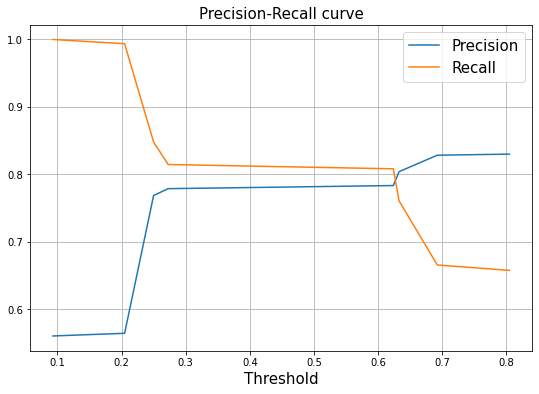

In [ ]:
# plotting precision recall graph:
precision_recall_plot (y_test, y_out_proba)

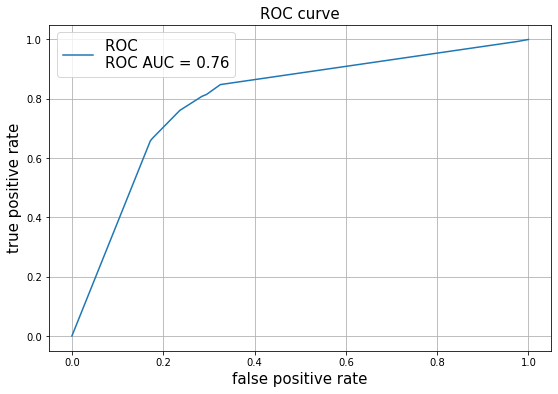

In [ ]:
# plotting roc-curve graph:
roc_curve_plt(y_test, y_out_proba,predictions)

### Model 2 Deep Tree

In [ ]:
# Training 
deep_tree = tree.DecisionTreeClassifier(random_state=1, max_depth = 20)
deep_tree.fit(X_train, y_train)
# Testing
deep_tree_predictions = deep_tree.predict(X_test)
# print metrics 
print_metrices (y_test,deep_tree_predictions)
# find probabilities
deep_tree_y_out_proba = deep_tree.predict_proba(X_test)

accuracy 0.7122557726465364
precision 0.7372488408037094
recall 0.7559429477020603
roc_auc 0.7078728546398506
F1-score 0.7464788732394366
log_loss 9.938454248236408


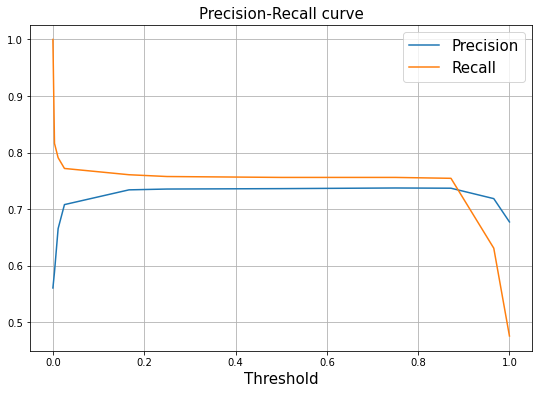

In [ ]:
# plotting precision recall graph:
precision_recall_plot (y_test, deep_tree_y_out_proba)

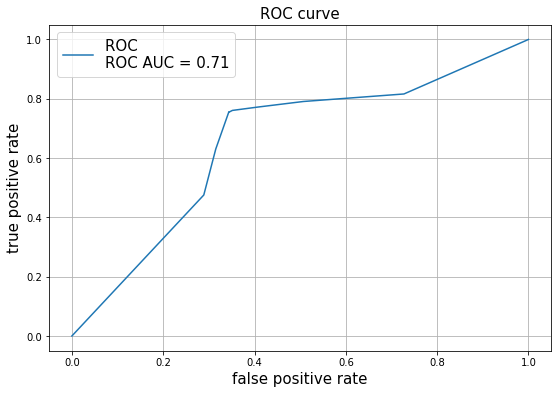

In [ ]:
# plotting roc-curve graph:
roc_curve_plt(y_test, deep_tree_y_out_proba,deep_tree_predictions)

### Model 3 random forest on small trees

In [ ]:
#Defining the model
rf_classifier_low_depth = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [ ]:
# A cross-validation generator splits the whole dataset k times in training and test data.
# Subsets of the training set with varying sizes will be used to train the estimator
# and a score (accuracy) for each training subset size and the test set will be computed.
# In order to choose the size of traind and test data
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_low_depth, df, y, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [ ]:
print (train_sizes)
print (train_scores.mean(axis = 1))
print (test_scores.mean(axis = 1))

[ 250  750 1250 1750 2250]
[0.74933333 0.71333333 0.68453333 0.69104762 0.69022222]
[0.62356685 0.64195598 0.65369955 0.66248974 0.66728527]


In [ ]:
# Splitting the dataset 
# train size that yeilded the best train accuracy is 2250
# Thus, test size = 3751-2250=1501 => test size = 40% total size
sf_X_train, sf_X_test, sf_y_train, sf_y_test = train_test_split(df,y,test_size=0.4, random_state=42)

In [ ]:
# fitting
rf_classifier_low_depth.fit(sf_X_train, sf_y_train)
# Testing
sf_predictions = rf_classifier_low_depth.predict(sf_X_test)
# print metrics 
print_metrices (sf_y_test,sf_predictions)
# find probabilities
sf_y_out_proba = rf_classifier_low_depth.predict_proba(sf_X_test)

accuracy 0.6628914057295137
precision 0.6759656652360515
recall 0.7553956834532374
roc_auc 0.6587209697006267
F1-score 0.7134767836919593
log_loss 11.643479236674699


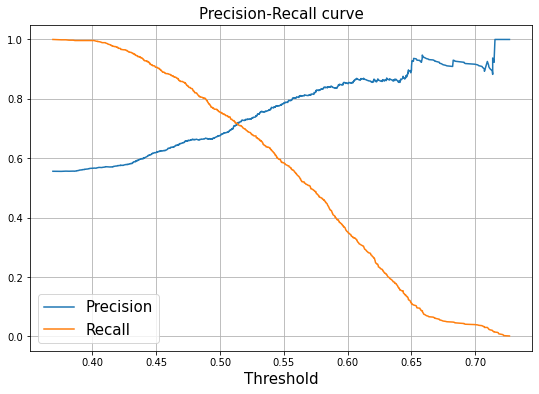

In [ ]:
# plotting precision recall graph:
precision_recall_plot (sf_y_test, sf_y_out_proba)

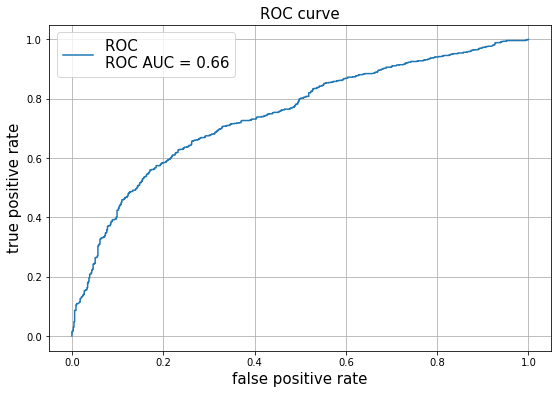

In [ ]:
# plotting roc-curve graph:
roc_curve_plt(sf_y_test, sf_y_out_proba,sf_predictions)

### Model 4 random forest on deep trees

In [ ]:
# defining the model
rf_classifier = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [ ]:
# testing different sizes of train and test datasets
d_train_sizes, d_train_scores, d_test_scores = learning_curve(rf_classifier, df, y, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

In [ ]:
print (d_train_sizes)
print (d_train_scores.mean(axis = 1))
print (d_test_scores.mean(axis = 1))

[ 250  750 1250 1750 2250]
[1.         0.98666667 0.96853333 0.95619048 0.93866667]
[0.67021817 0.74007077 0.75286736 0.76619515 0.77499195]


For deep tree, the same size of test data yeilded the best testing accuracy, so the same splited data used for shallow forest will be used for deep forest

In [ ]:
# fitting
rf_classifier.fit(sf_X_train, sf_y_train)
# Testing
df_predictions = rf_classifier.predict(sf_X_test)
# print metrics 
print_metrices (sf_y_test,df_predictions)
# find probabilities
df_y_out_proba = rf_classifier.predict_proba(sf_X_test)

accuracy 0.7788141239173884
precision 0.8129675810473815
recall 0.7817745803357314
roc_auc 0.7762978105523031
F1-score 0.7970660146699267
log_loss 7.6395694222017845


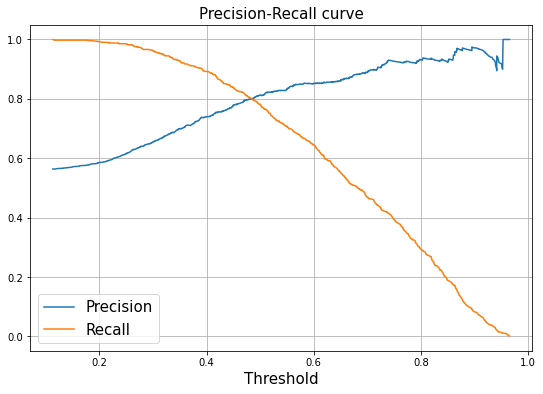

In [ ]:
# plotting precision recall graph:
precision_recall_plot (sf_y_test, df_y_out_proba)

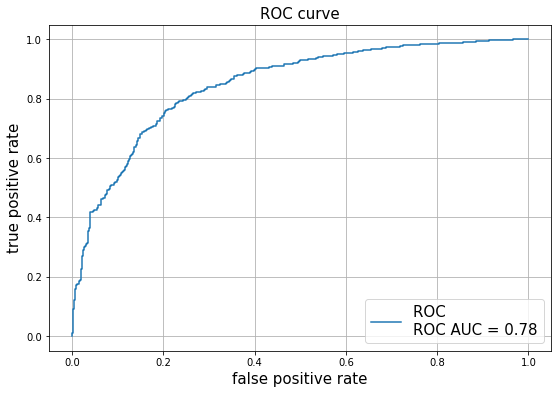

In [ ]:
# plotting roc-curve graph:
roc_curve_plt(sf_y_test, df_y_out_proba,df_predictions)

## Training a classifier that avoids Type II (False Negative) errors
and calculating different metrics to evaluate it.
Note: avoids Type II == recall for that algorithm should be greater than 0.95


In [ ]:
# defining svm model 
clf_svm = svm.SVC(probability=True)
# fitting
clf_svm.fit(X_train, y_train)
# testing
svm_predictions = clf_svm.predict(X_test)
# print metrics 
print_metrices (y_test,svm_predictions)

accuracy 0.7868561278863233
precision 0.7984732824427481
recall 0.8288431061806656
roc_auc 0.7845869596927116
F1-score 0.8133748055987557
log_loss 7.3618222749905415


After taining and evaluating a SVM model.In the following, I will try to modify the model to minimize false negatives.
To minimize false negatives, I will set higher weights for training samples labeled as the positive class, by default the weights are set to 1 for all classes. To change this, I will use the hyper-parameter class_weight .

SVC(class_weight={0: 0.5, 1: 2}, probability=True)

In [ ]:
#  Defining a weights dictionary
weights = {
  1 : 2,
  0 : 0.5
}
# defining the model
clf_svm_weighted = svm.SVC(class_weight=weights,probability=True)
# fitting
clf_svm_weighted.fit(X_train, y_train)
# testing 
svm_weighted_predictions = clf_svm_weighted.predict(X_test)
# printing the matrices
print_metrices (y_test,svm_weighted_predictions)

accuracy 0.6953818827708703
precision 0.6535181236673774
recall 0.971473851030111
roc_auc 0.7788867214081567
F1-score 0.781389420012747
log_loss 10.521367826482397


In [ ]:
# find probabilities
svm_weighted_y_out_proba = clf_svm_weighted.predict_proba(X_test)

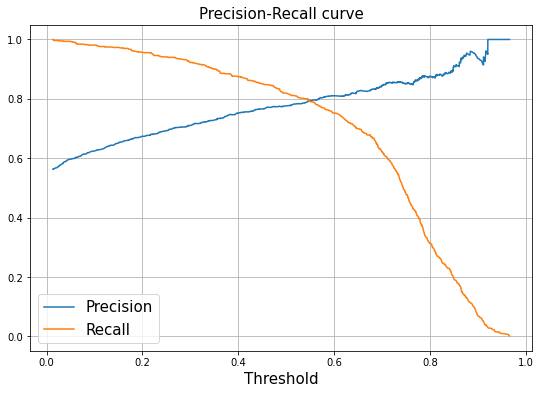

In [ ]:
# plotting precision recall graph:
precision_recall_plot (y_test, svm_weighted_y_out_proba)

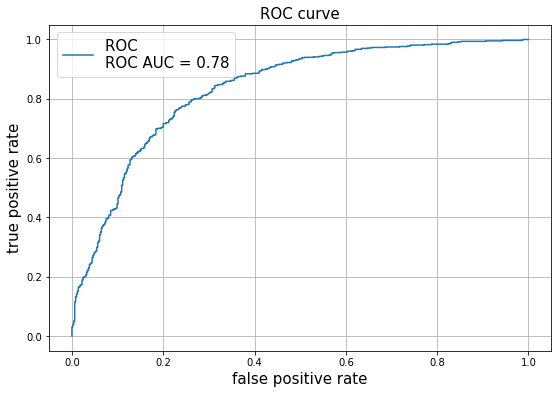

In [ ]:
# plotting roc-curve graph:
roc_curve_plt(y_test, svm_weighted_y_out_proba,svm_weighted_predictions)